In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import numpy as np

from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [3]:
df = pd.read_csv("data.csv"  , converters= {"year" : str})

In [4]:
df['0-1(%)'] = df['0(%)'] + df['1(%)']

In [5]:
degree_compare = df.pivot_table(index=['degree','year','sem','subject'] , values='section',aggfunc= pd.Series.nunique).reset_index()
fig = px.bar(degree_compare.pivot_table(index=['degree','year'], values='section' , aggfunc='sum').reset_index(), x='year' , y='section' , facet_col='degree' , text_auto=True ,color='degree')

fig.update_layout({
'plot_bgcolor':'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(gridcolor='rgba(0, 0, 0, 0)' , linecolor = 'black' ,linewidth = 1.5 )
fig.update_yaxes(gridcolor='rgba(0, 0, 0, 0)' , linecolor = 'black'  , linewidth = 1.5)
fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5 
                  , textposition='outside'
                  )
fig.show()


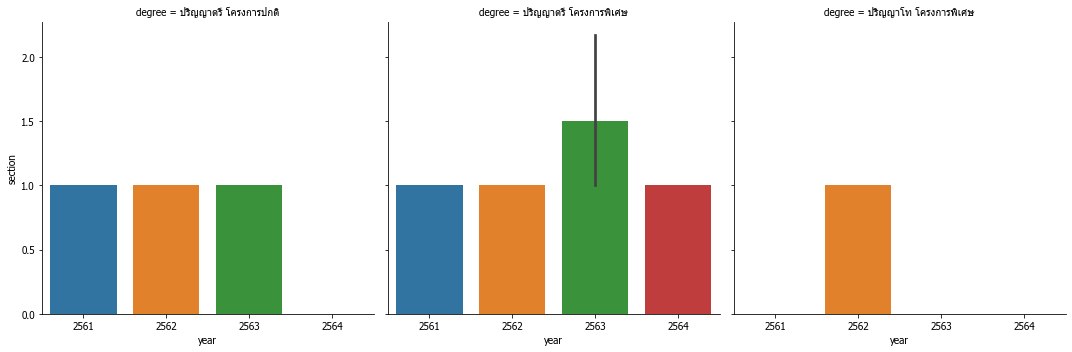

In [6]:
plt.rcParams.update({'font.family' : 'tahoma'})
g = sns.catplot(data = degree_compare , x='year' , y='section' , col='degree' , kind='bar')

In [7]:
df.drop(columns= ["url","class", "นักศึกษาที่ประเมิน"],inplace= True)

In [8]:
pvt = df.pivot_table(columns=["year"] ,index=["situation"] , values= ["section"] , aggfunc= pd.Series.nunique).reset_index()

In [9]:
pvt = df.pivot_table(index=["year","sem","situation","subject"] ,values= ["section"] , aggfunc= pd.Series.nunique).reset_index()

fig = make_subplots(rows=1, cols=4 ,specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
for i in range(1,5):
  fig.add_trace(go.Pie(labels=pvt.loc[pvt["year"] == f'256{i}' , 'situation'], values=pvt.loc[pvt["year"] == f'256{i}' , 'section'], name=f"256{i}"),1, i)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Situation 2561 - 2564",
    # Add annotations in the center of the donut pies.
      annotations=[dict(text='2561', x=0.087 , y=0.5, font_size=20, showarrow=False),
                  dict(text='2562', x=0.368 , y=0.5, font_size=20, showarrow=False),
                  dict(text='2563', x=0.634, y=0.5, font_size=20, showarrow=False),
                  dict(text='2564', x=0.914, y=0.5, font_size=20, showarrow=False)
                  ])
fig.show()

In [10]:
cov  = df[df["situation"] == "covid"]
norm  = df[df["situation"] == "normal"]

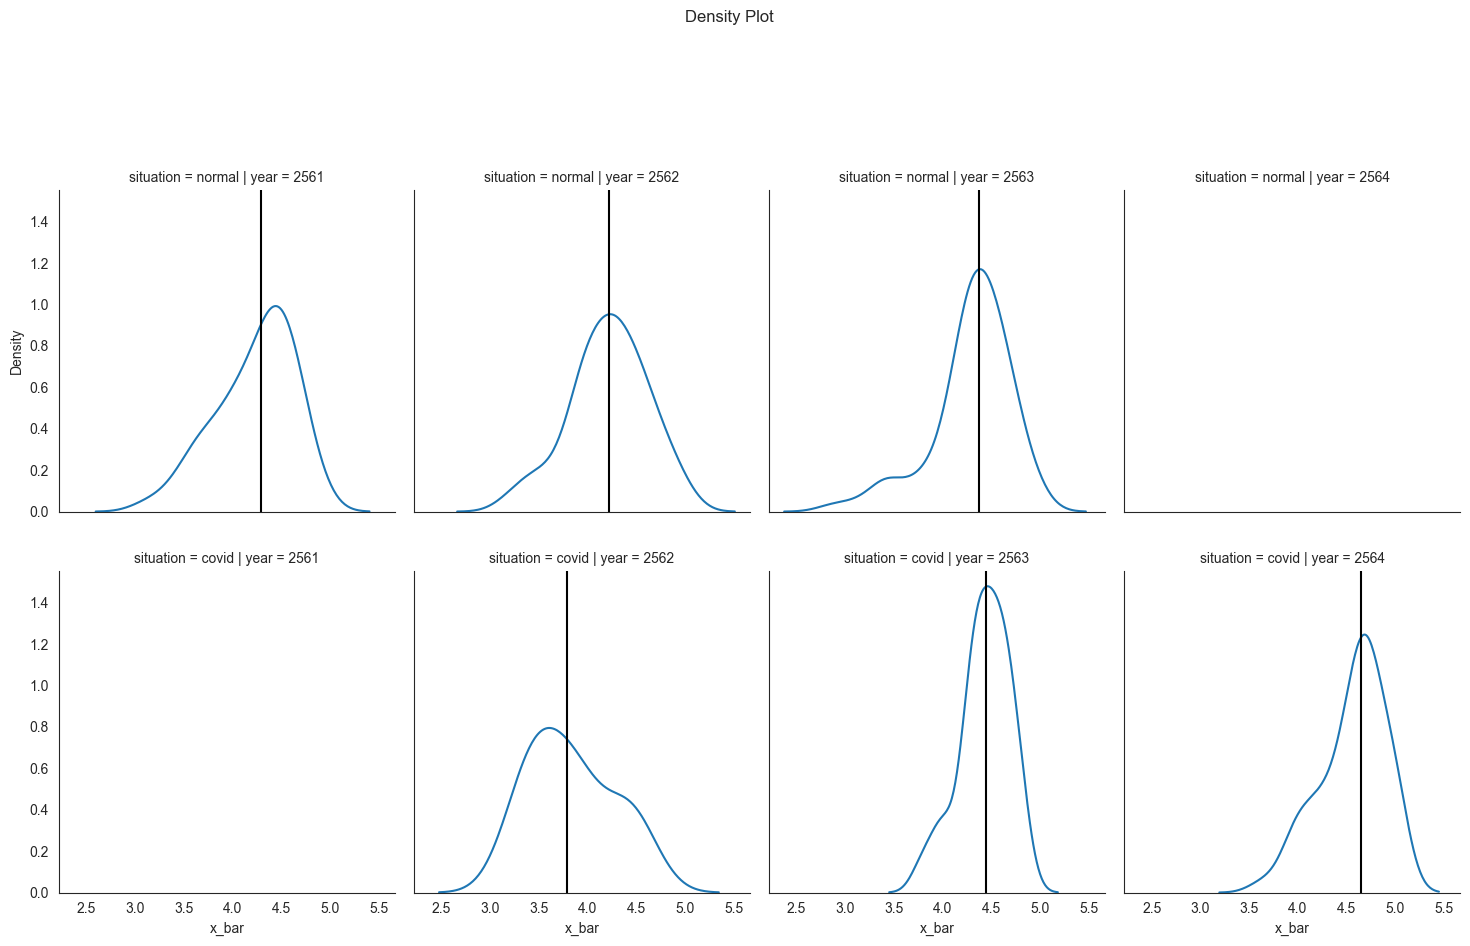

In [11]:
sns.set_style("white")

g = sns.FacetGrid(df , col="year" ,row='situation' , col_order=sorted(df['year'].unique()) )
g = g.map(sns.kdeplot , "x_bar")
g = g.map(lambda y, **kw: plt.axvline(y.median(), color="k"), 'x_bar')

g.fig.set_size_inches(15,10)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Density Plot")
sns.despine()

plt.savefig("Dense.png", transparent=True)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



Text(0.5, 1.0, 'covid')

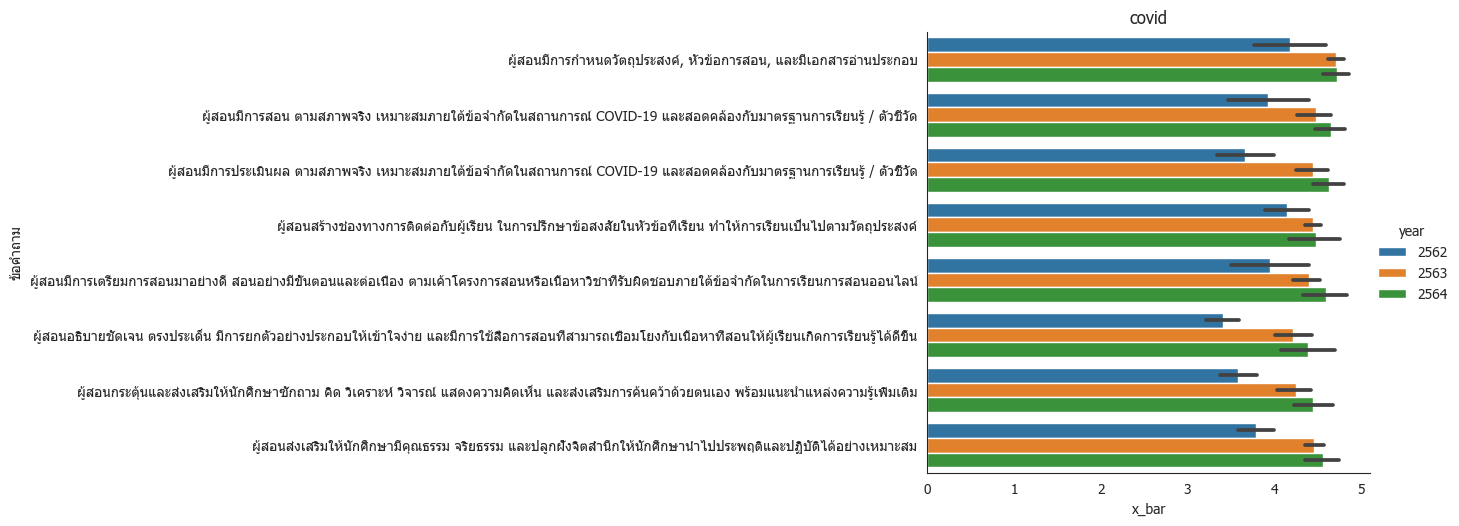

In [12]:
plt.rcParams.update({"font.family":"tahoma"})
sns.catplot(data=cov , x="x_bar",hue_order= ["2562","2563","2564"] , y="ข้อคำถาม" , hue="year",kind="bar" )
plt.title("covid")

In [13]:
pvt = df.pivot_table(index=["year","sem","situation","subject"] ,values= ["section"] , aggfunc= pd.Series.nunique).reset_index()

In [30]:
pvt = df.pivot_table(index=["year","sem","situation","subject"] ,values= ["section"] , aggfunc= pd.Series.nunique).reset_index()

fig = make_subplots(rows=1, cols=4 ,specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
for i in range(1,5):
  fig.add_trace(go.Pie(labels=pvt.loc[pvt["year"] == f'256{i}' , 'situation'], values=pvt.loc[pvt["year"] == f'256{i}' , 'section'], name=f"256{i}"),1, i)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Situation 2561 - 2564",
    # Add annotations in the center of the donut pies.
      annotations=[dict(text='2561', x=0.093 , y=0.5, font_size=20, showarrow=False),
                  dict(text='2562', x=0.368 , y=0.5, font_size=20, showarrow=False),
                  dict(text='2563', x=0.633, y=0.5, font_size=20, showarrow=False),
                  dict(text='2564', x=0.906, y=0.5, font_size=20, showarrow=False)
                  ])
fig.update_layout({
'plot_bgcolor':'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)'
})
fig.show()

In [15]:
df = df[df['degree']== 'ปริญญาตรี โครงการพิเศษ']
cov = df[df['situation'] == 'covid']
norm = df[df['situation'] == 'normal']

In [39]:
def pvt(data , year) :   
    pvt = data.pivot_table(index = ['year' , 'sem', "subject" ] , values= 'x_bar' , aggfunc= 'mean').reset_index()
    pvt.loc[pvt['year'] == year ,'diff']  =  pvt.loc[pvt['year'] == year ,'x_bar']  - pvt['x_bar'].mean() 
    pvt['color'] = ""
    ind = 0
    for i in pvt['diff']  :
        if i > 0 :
            pvt.iloc[ind , 5] = 'mediumseagreen'
            ind += 1
        else: 
            pvt.iloc[ind , 5] = 'crimson'
            ind+=1
    pvt["dec"] = pvt['diff'].round(3)
    pvt["mean"] = pvt.loc[pvt['year'] == year ,'x_bar'].mean() 
    return pvt[pvt['year'] == year]

In [40]:
fig = make_subplots(rows=2, cols=4 , subplot_titles= ['Mean : 4.476','Mean : 4.476' , 'Mean : 4.476','','','Mean : 4.287','Mean : 4.287', 'Mean : 4.287'] , shared_yaxes= True)

for i in range(1,5):
    fig.add_trace(
        go.Bar(x=pvt(cov,f'256{i}')['subject'], y= pvt(cov,f'256{i}')['diff'] , marker=  dict(color =pvt(cov,f'256{i}')['color']) , text= pvt(cov,f'256{i}')['dec']  ),
        row=2, col=i
)

for i in range(1,5):
    fig.add_trace(
        go.Bar(x=pvt(norm,f'256{i}')['subject'], y=pvt(norm,f'256{i}')['diff'] , marker=  dict(color = pvt(norm,f'256{i}')['color']), text= pvt(norm,f'256{i}')['dec']),
        row=1, col=i
)

for i in range(1,5):
    fig.update_xaxes(title_text= f"256{i}", row=2, col=i)

fig.update_yaxes(title_text= "Normal", row=1, col=1)
fig.update_yaxes(title_text= "Covid"  ,  row=2, col=1  )
fig.update_layout(showlegend=False, height=1000, width=2000 ,title_text="Difference From Mean" , font = dict(size = 18))
fig.update_traces(textposition='auto')

fig.update_layout({
'plot_bgcolor':'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.update_xaxes(gridcolor='black' )
fig.update_yaxes(gridcolor='black' )
fig.show()


In [18]:
cov_pvt = cov.pivot_table(index=["topic", 'ข้อคำถาม'] , values='x_bar' , aggfunc= 'mean').reset_index()
norm_pvt = norm[norm['topic'] == 'ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย'].pivot_table(index=["topic","ข้อคำถาม"] , values='x_bar',aggfunc='mean').reset_index()

In [19]:
pivot = df.pivot_table(index=['situation','year','sem','subject','section','topic','ข้อคำถาม'] , values='x_bar' , aggfunc='mean').reset_index()
pivot.sort_values(by='year' , inplace =True)

In [20]:

fig = px.box(pivot , x='x_bar' , facet_col= 'year' , facet_row= 'situation' )



fig.update_layout({
'plot_bgcolor':'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)'
})

fig.update_xaxes(gridcolor='black' , linecolor = 'black' ,linewidth = 1.5 )
fig.update_yaxes(gridcolor='black' , linecolor = 'black'  , linewidth = 1.5)
fig.update_traces(marker_line_color='black',
                  marker_line_width=1)

fig.show()

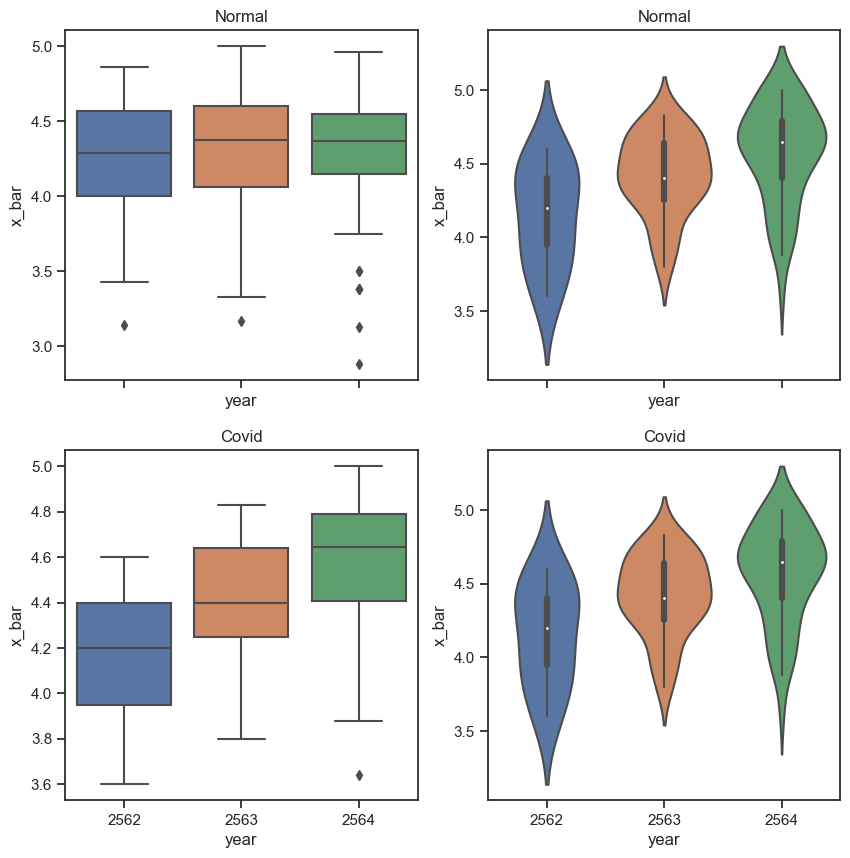

In [21]:
sns.set_theme(style="ticks")
fig, axes = plt.subplots(2, 2 ,sharex=True, figsize=(10,10))

sns.boxplot(ax=axes[0,0], data=norm.sort_values(by='year') , x='year', y='x_bar')
axes[0,0].set_title('Normal')

sns.violinplot(ax=axes[0,1] , data=cov.sort_values(by='year') , x='year', y='x_bar')
axes[0,1].set_title('Normal')

sns.boxplot(ax=axes[1,0] , data=cov.sort_values(by='year') , x='year', y='x_bar')
axes[1,0].set_title('Covid')

sns.violinplot(ax=axes[1,1] , data=cov.sort_values(by='year') , x='year', y='x_bar')
axes[1,1].set_title('Covid')

plt.savefig("boxplot.png", transparent=True)

In [22]:
outliners = []
for sit in [cov,norm]:
    for year in sorted(sit['year'].unique()): 
        q3 = sit.loc[(sit['year'] == year) , 'x_bar'].quantile(0.75) 
        q1 = sit.loc[(sit['year'] == year) , 'x_bar'].quantile(0.25)
        iqr = q3 - q1
        outline = sit[(sit['year'] == year)&((sit['x_bar'] > q3 + (1.5 * iqr)) | (sit['x_bar'] < q1 - (1.5 *iqr))) ]
        outliners.append(outline)
outliner  = pd.concat(outliners)
outliner.pivot_table(index=['situation','year', 'subject','section','topic','ข้อคำถาม'], values='x_bar' )

x_bar
situation year subject section topic                                           ข้อคำถาม                                                 
covid     2564 YRY790  231863  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย            ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างปร...   3.64
normal    2561 YRY790  231863  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย            กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสน...   3.14
          2562 FGL497  231863  ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้ สภาพของห้องเรียนหรือห้องปฏิบัติการ เช่น แสง อุณ...   3.17
          2563 YRY790  728025  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย            กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสน...   3.13
                                                                               ทำให้เห็นความสัมพันธ์กับวิชาอื่นที่เกี่ยวข้อง        3.38
                                                                               สอนให้คิด วิเคราะห์ วิจารณ์                          3.38
                                                                               แนะนำแหล่งค้นคว้าข้อมูลเพิ่มเติมให้                  2.88
                                                                               ใช้สื่อและอุปกรณ์ช่วยสอนได้ดี                        3.50
                               ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน               ผู้สอนชี้แนะจุดมุ่งหมายประเด็นหรือข้อสรุปที่เป็...   3.38
                                                                               ผู้สอนแทรกเนื้อหาเกี่ยวกับคุณธรรมจริยธรรมในการเ...   3.50

In [26]:
outliner.pivot_table(index=['situation','year', 'subject','section','topic','ข้อคำถาม'], values='x_bar' )

x_bar
situation year subject section topic                                           ข้อคำถาม                                                 
covid     2564 YRY790  231863  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย            ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างปร...   3.64
normal    2561 YRY790  231863  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย            กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสน...   3.14
          2562 FGL497  231863  ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้ สภาพของห้องเรียนหรือห้องปฏิบัติการ เช่น แสง อุณ...   3.17
          2563 YRY790  728025  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย            กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสน...   3.13
                                                                               ทำให้เห็นความสัมพันธ์กับวิชาอื่นที่เกี่ยวข้อง        3.38
                                                                               สอนให้คิด วิเคราะห์ วิจารณ์                          3.38
                                                                               แนะนำแหล่งค้นคว้าข้อมูลเพิ่มเติมให้                  2.88
                                                                               ใช้สื่อและอุปกรณ์ช่วยสอนได้ดี                        3.50
                               ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน               ผู้สอนชี้แนะจุดมุ่งหมายประเด็นหรือข้อสรุปที่เป็...   3.38
                                                                               ผู้สอนแทรกเนื้อหาเกี่ยวกับคุณธรรมจริยธรรมในการเ...   3.50

In [27]:
outliner['x_bar'] = round(outliner['x_bar'] , 3)

In [28]:

fig = px.treemap(outliner , path=[ px.Constant('Outliner')  ,'subject','situation' ,'year', 'topic' , 'ข้อคำถาม' ] , values='x_bar' ,  color='x_bar', hover_data=['x_bar','section'],
                  color_continuous_scale= 'ice',
                  color_continuous_midpoint=np.average(outliner['x_bar'], weights=outliner['x_bar']) ,
                  width=3000, height=1500)


fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_layout({
'plot_bgcolor':'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)'
})
fig.update_traces(textinfo = 'label+value')
fig.update_layout(uniformtext=dict(minsize=20, mode='show'))
fig.show()